In [67]:
import tensorflow as tf
from edward.models import Poisson, Normal

In [78]:
nuispar = tf.constant([3.])

x = Poisson(rate = tf.ones(1)*nuispar)
n = Normal(loc = nuispar, scale = tf.ones(1))
joined = tf.concat([x,n], axis=0)   # p(n, x | nuispar) = Pois(n|nuispar) * Normal(x |mu = nuispar, sigma = 1)

In [79]:
results = []
for i in range(1000): #thee is probably a batched evaluation version .. this is stupid
    with tf.Session() as sess:
        r = sess.run(joined)
        results.append(r)

Populating the interactive namespace from numpy and matplotlib


/Users/lukas/.local/share/virtualenvs/pyhf-EFAVEj2h/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


(array([  6.,  32.,  62., 140., 188., 243., 191.,  87.,  41.,  10.]),
 array([-0.08035064,  0.51699646,  1.11434355,  1.71169064,  2.30903773,
         2.90638483,  3.50373192,  4.10107901,  4.6984261 ,  5.2957732 ,
         5.89312029]),
 <a list of 10 Patch objects>)

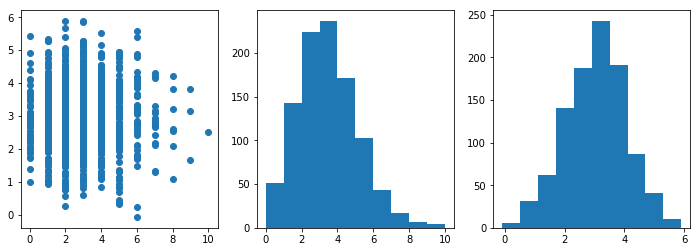

In [80]:
%pylab inline
r = np.array(results)
f, axarr = plt.subplots(1,3)
f.set_size_inches(12,4)
axarr[0].scatter(r[:,0],r[:,1])
axarr[1].hist(r[:,0], bins = np.linspace(0,10,11))
axarr[2].hist(r[:,1])